In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from collections import Counter
sns.set_context('notebook')
sns.set_palette('tab10')

# In the cell below, you can find a link to the dataset

[The movies dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset)

In [2]:
!ls *.csv

credits_clean.csv
keywords_clean.csv
links_clean.csv
metadata_clean.csv


In [3]:
keywords = pd.read_csv('keywords_clean.csv')
credits = pd.read_csv('credits_clean.csv')
links = pd.read_csv('links_clean.csv')
metadata = pd.read_csv('metadata_clean.csv')
ratings = pd.read_csv('the-movies-dataset/ratings.csv')

In [4]:
credits.head(2)

,Unnamed: 0,cast,crew,id
0,0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


**Extracting the names of the casting plus their genders and their order, and save it to a pickle file**

In [5]:
#y = lambda i, j:(eval(credits.iloc[i,1])[j]['name'], eval(credits.iloc[i,1])[j]['gender'], eval(credits.iloc[i,1])[j]['order']) if len(eval(credits.iloc[i,1]))>0 else ''
#actor_gender_order = [y(i,j) for i in range(len(credits)) for j in range(len(eval(credits.iloc[i,1])))]
#file = open('actor_gender_order.pkl', 'wb')
#pickle.dump(actor_gender_order, file)
#file.close()

In [6]:
with open('actor_gender_order.pkl', 'rb') as file:
    cast = pickle.load(file)

In [7]:
actor, gender, order = zip(*cast)

**top 10 casts**

In [8]:
cast_df = pd.DataFrame({'cast':actor, 'gender':gender, 'order':order})

In [9]:
cast_df.head()

,cast,gender,order
0,Tom Hanks,2,0
1,Tim Allen,2,1
2,Don Rickles,2,2
3,Jim Varney,2,3
4,Wallace Shawn,2,4


# 1)top 10 leading roles of all time

C:\Users\amir\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


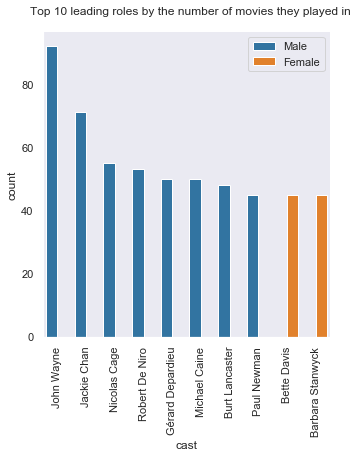

In [10]:
sns.set_style('dark')
top_cast = cast_df[cast_df.order<1]
top_10 = top_cast.cast.value_counts()[:10]
top_cast.gender = np.where(top_cast.gender==1,'Female', np.where(top_cast.gender==2, 'Male', 'Unknown'))
g = sns.catplot(x='cast', data=top_cast, kind='count', order = top_10.index, hue='gender', hue_order=['Male', 'Female'], legend=False)
_=plt.xticks(rotation=90)
g.fig.suptitle("Top 10 leading roles by the number of movies they played in", y=1.04)
_=plt.legend(loc='best')

In [11]:
meta_credits = pd.merge(metadata, credits, on='id')

In [12]:
meta_credits.head(1)

,release_date,adult,genres,id,original_language,overview,popularity,production_countries,runtime,spoken_languages,status,title,video,vote_average,vote_count,Unnamed: 0,cast,crew
0,1878-06-14,False,"[{'id': 99, 'name': 'Documentary'}]",194079.0,en,Sallie Gardner at a Gallop was one of the earl...,0.327841,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Sallie Gardner at a Gallop,False,6.2,25.0,34949,"[{'cast_id': 5, 'character': 'Herself - Sallie...","[{'credit_id': '52fe4ce29251416c91103327', 'de..."


*save cast and release date in a pickle file*

In [16]:
#cast_year = [(eval(meta_credits.cast[i])[j]['name'],eval(meta_credits.cast[i])[j]['gender'],eval(meta_credits.cast[i])[j]['order'],meta_credits.release_date[i]) for i in range(len(meta_credits)) for j in range(len(eval(meta_credits.cast[i]))) if len(eval(meta_credits.cast[i]))>0]
#with open('cast_year.pkl', 'wb') as file:
#    pickle.dump(cast_year, file)

In [17]:
with open('cast_year.pkl', 'rb') as file:
    cast_year = pickle.load(file)

In [18]:
name, gender, order, time = zip(*cast_year)

In [19]:
cast_year_df = pd.DataFrame({'name':name, 'gender':gender, 'order':order, 'release_date':time})
cast_year_df.drop_duplicates(inplace=True)
cast_year_df['decade'] = cast_year_df.release_date.dt.year//10*10
cast_year_df.gender = np.where(cast_year_df.gender==1, 'Female', np.where(cast_year_df.gender==2, 'Male', 'Unknown'))

# 2)top 10 lead casts per decade (1930-2010)

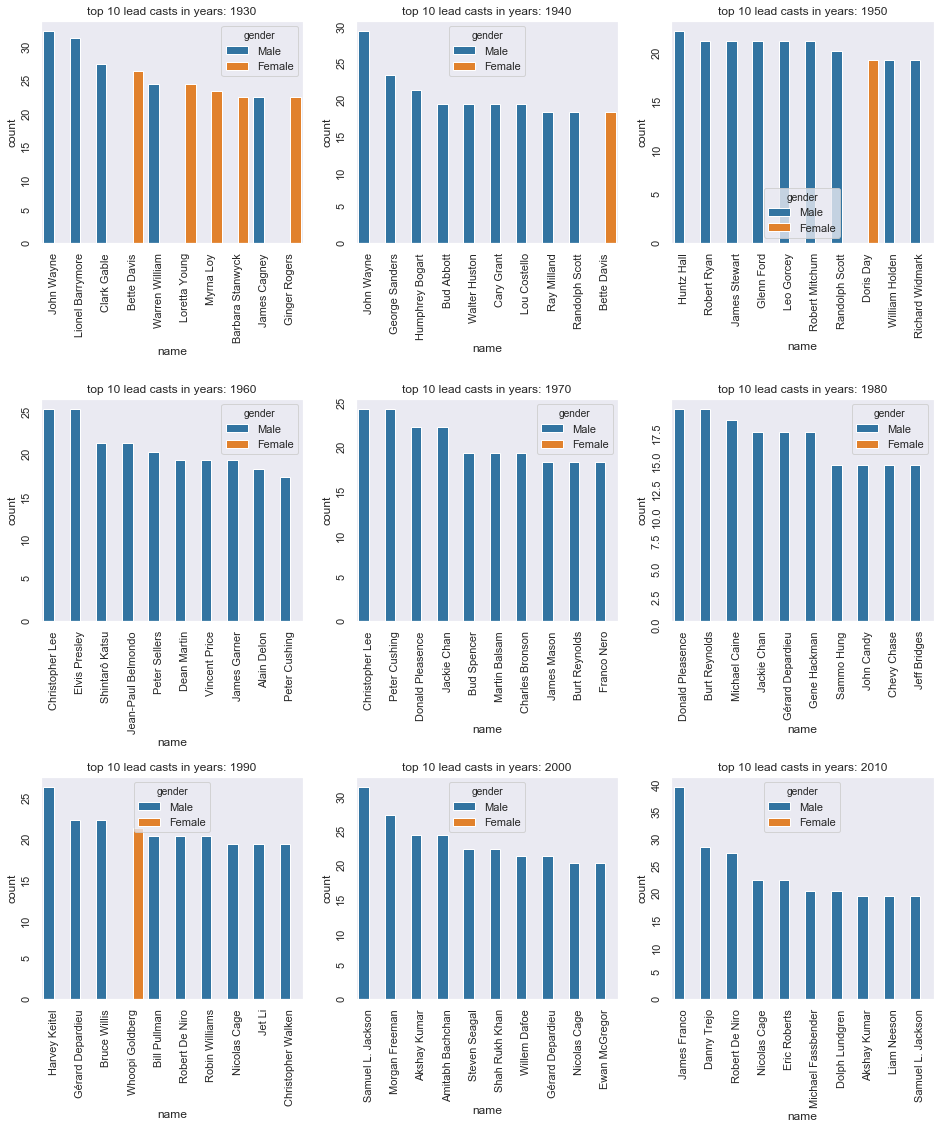

In [20]:
top_cast = cast_year_df[cast_year_df.order<3]
grouped=top_cast[(top_cast.decade>1920) & (top_cast.decade < 2020)].groupby('decade')
fig, axes = plt.subplots(3,3, figsize=(16,18))
target = zip(grouped.groups.keys(), axes.flatten())
for key, ax in target:
    group = grouped.get_group(key)
    order = group['name'].value_counts()[:10].index
    sns.countplot(x='name', data=group, order = order, ax=ax, hue='gender', hue_order=['Male', 'Female'])
    ax.tick_params(rotation=90)
    #grouped.get_group(key)['name'].value_counts()[:10].plot(kind='bar', ax=ax)
    ax.set_title('top 10 lead casts in years: {}'.format(key))
    
plt.subplots_adjust(wspace=.2, hspace=.7)
plt.grid(False)
#fig.delaxes(axes.flatten()[7])
#fig.delaxes(axes.flatten()[8])
#ax.set_visible(False)


**the bar charts clearly show that top roles are played mostly by men, there are only several women (orange bars) in all decades combined, with the exception of the 1930's, in which women are almost equally casted for top roles as men**

In [21]:
keywords_credits = pd.merge(keywords, credits, on='id')
keywords_credits.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

In [22]:
keywords_credits.head()

,id,keywords,cast,crew
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [23]:
metadata.head(2)

,release_date,adult,genres,id,original_language,overview,popularity,production_countries,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,1878-06-14,False,"[{'id': 99, 'name': 'Documentary'}]",194079.0,en,Sallie Gardner at a Gallop was one of the earl...,0.327841,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Sallie Gardner at a Gallop,False,6.2,25.0
1,1883-11-19,False,"[{'id': 99, 'name': 'Documentary'}]",426903.0,en,Individual photographs of the running of a buf...,0.229221,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Buffalo Running,False,5.4,7.0


# 3)number of movies produced per decade

In [24]:
metadata.release_date = pd.to_datetime(metadata.release_date, format='%Y-%m-%d')

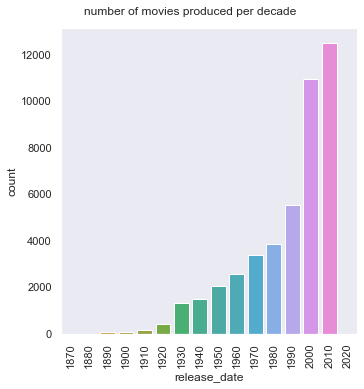

In [25]:
decades = metadata.release_date.dt.year//10*10
df = pd.DataFrame(decades)
g=sns.catplot(x='release_date', data=df, kind='count')
g.fig.suptitle('number of movies produced per decade', y=1.03)
_=plt.xticks(rotation=90)

**a clear increase in movie production per decade, with a big shift between 1990's and 2000's**

# 4)number of movies produced per year

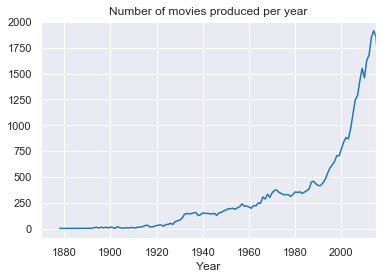

In [26]:
metadata.release_date.dt.year.value_counts().sort_index().plot()
plt.xlim([1870, 2015])
plt.title('Number of movies produced per year')
plt.xlabel('Year')
plt.grid(True)

**clear increase in movie production per year since 1880, with some decrease at periods like 1940-1945, which needs more investigagion**

*storing movie genres alongside it's release date in a pickle file*

In [27]:
#genres_year = [(eval(metadata.genres[i])[j]['name'], metadata.release_date.dt.year[i]) for i in range(len(metadata)) for j in range(len(eval(metadata.genres[i]))) if len(eval(metadata.genres[i]))>0]
#with open('genres_year.pkl', 'wb') as file:
#    pickle.dump(genres_year, file)

In [28]:
with open('genres_year.pkl', 'rb') as file:
    genres_year = pickle.load(file)

genres, year = zip(*genres_year)
genres_df = pd.DataFrame({'genres':genres, 'year':year})

In [29]:
genres_df.head()

,genres,year
0,Documentary,1878
1,Documentary,1883
2,Comedy,1890
3,Documentary,1891
4,Comedy,1892


In [30]:
genres_df.year = pd.to_datetime(genres_df.year, format='%Y')
top_10_genres = genres_df.genres.value_counts()[:10]

In [31]:
#genres_df.groupby(genres_df.year.dt.year//10*10).apply(lambda g:g.genres.value_counts()[:2])

# 5)top 10 genres of all time

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

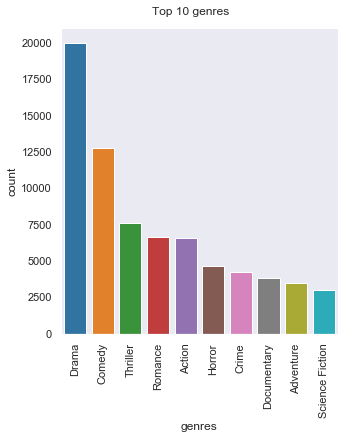

In [32]:
genres_df['decade'] = genres_df.year.dt.year//10*10
g=sns.catplot(x = 'genres', data=genres_df, kind='count', order = top_10_genres.index)
g.fig.suptitle('Top 10 genres', y=1.03)
plt.xticks(rotation=90)

# 6)top 5 genres in 4 decades: a comparison

In [33]:
genres_df.head(2)

,genres,year,decade
0,Documentary,1878-01-01,1870
1,Documentary,1883-01-01,1880


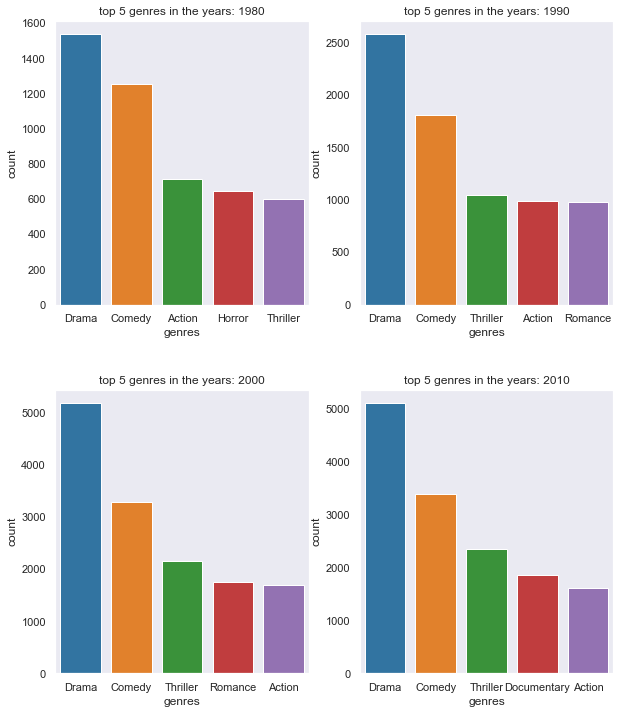

In [34]:
fig, axes = plt.subplots(2,2, figsize=(10, 12))
df = genres_df[(genres_df.decade > 1970) & (genres_df.decade < 2020)]
grouped = df.groupby('decade')
target = zip(grouped.groups.keys(), axes.flatten())
for key, ax in target:
    group = grouped.get_group(key)
    order = group.genres.value_counts()[:5].index
    sns.countplot(x = 'genres', data=group, ax=ax, order = order)
    #grouped.get_group(key)['genres'].value_counts()[:5].plot(kind='bar', ax=ax)
    ax.set_title("top 5 genres in the years: {}".format(key))
    
plt.subplots_adjust(hspace=.3)

**the majority of movies produced in the last 4 decades are labeled as Drama and Comdey**

In [35]:
meta_credits.head()

,release_date,adult,genres,id,original_language,overview,popularity,production_countries,runtime,spoken_languages,status,title,video,vote_average,vote_count,Unnamed: 0,cast,crew
0,1878-06-14,False,"[{'id': 99, 'name': 'Documentary'}]",194079.0,en,Sallie Gardner at a Gallop was one of the earl...,0.327841,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Sallie Gardner at a Gallop,False,6.2,25.0,34949,"[{'cast_id': 5, 'character': 'Herself - Sallie...","[{'credit_id': '52fe4ce29251416c91103327', 'de..."
1,1890-11-21,False,"[{'id': 35, 'name': 'Comedy'}]",32571.0,en,Experimental film made to test the original cy...,1.163672,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.0,[],Released,"Monkeyshines, No. 1",False,4.3,15.0,34947,"[{'cast_id': 10, 'character': 'Himself', 'cred...","[{'credit_id': '52fe44d99251416c9101ef9f', 'de..."
2,1891-01-01,False,"[{'id': 99, 'name': 'Documentary'}]",336380.0,fr,This early cinematic instance of a close-up—or...,0.212894,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Je Vous Aime,False,3.3,3.0,41206,"[{'cast_id': 0, 'character': 'Himself', 'credi...","[{'credit_id': '553266c4925141631000227d', 'de..."
3,1892-01-01,False,[],105157.0,en,William K.L. Dickson and William Heise shake h...,0.248422,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,A Hand Shake,False,2.3,7.0,35159,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '597a6abec3a3681e800005f1', 'de..."
4,1894-01-01,False,"[{'id': 99, 'name': 'Documentary'}]",189054.0,en,"Luis Martinetti, a contortionist suspended fro...",0.160054,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,"Luis Martinetti, Contortionist",False,6.5,4.0,44975,"[{'cast_id': 3, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4d4f9251416c75136e0b', 'de..."


# 7)top languages of the movie industie by percentage

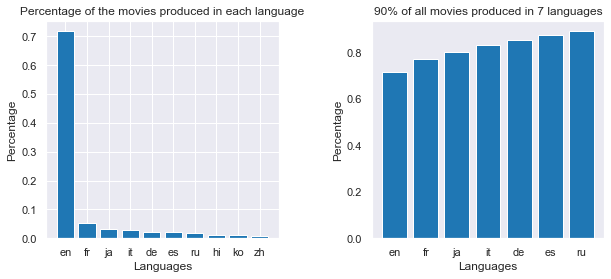

In [49]:
top_languages=meta_credits.original_language.value_counts()/len(meta_credits)
num=top_languages.cumsum().searchsorted(0.9)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.bar(top_languages[:10].index, top_languages[:10].values)
ax.set_title("Percentage of the movies produced in each language")
ax.set_xlabel("Languages")
ax.set_ylabel("Percentage")
plt.grid(True)
ax2 = fig.add_subplot(1,2,2)
ax2.bar(top_languages.cumsum()[:num].index, top_languages.cumsum()[:num])
ax2.set_title("90% of all movies produced in 7 languages")
ax2.set_xlabel("Languages")
ax2.set_ylabel("Percentage")
plt.subplots_adjust(wspace=.4)
plt.grid(False)
#sns.catplot(x='original_language', data=meta_credits, kind='count', order = top_languages.index)

**90% of all movies are produced in the world are in 7 languages, with majority being in english with more than 70% of all movies produced so far**

*storing the producer countries and the language in a pickle file*

In [50]:
#contry_lan_year=[(eval(meta_credits.production_countries[i])[j]['name'], meta_credits.original_language[i], meta_credits.release_date[i]) for i in range(len(meta_credits)) for j in range(len(eval(meta_credits.production_countries[i]))) if len(eval(meta_credits.production_countries[i]))>0]
#with open('country_lan.pkl', 'wb') as file:
#    pickle.dump(contry_lan_year)

In [56]:
with open('country_lan.pkl', 'rb') as file:
    country_lan = pickle.load(file)

In [57]:
country, language, release_date=zip(*country_lan)

In [58]:
country_lan_df = pd.DataFrame({'country':country, 'language':language, 'release_date':release_date})
country_lan_df['us']=np.where(country_lan_df.country=='United States of America', 'USA', 'Rest of The World')
country_lan_df['decade']=country_lan_df.release_date.dt.year//10*10

In [59]:
country_lan_df.head()

,country,language,release_date,us,decade
0,United States of America,en,1878-06-14,USA,1870
1,United States of America,en,1890-11-21,USA,1890
2,France,fr,1891-01-01,Rest of The World,1890
3,United States of America,en,1892-01-01,USA,1890
4,United States of America,en,1894-01-01,USA,1890


# 8)number of movies produced: USA vs. Rest of the World

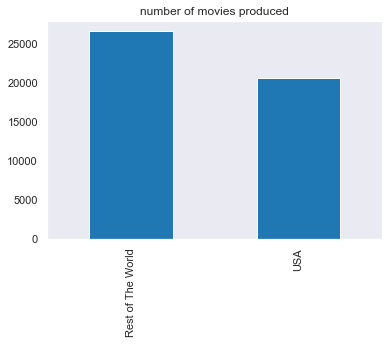

In [60]:
country_lan_df.us.value_counts().plot(kind='bar', title='number of movies produced')

**a comparison between all the movies produced in the usa and rest of the world**

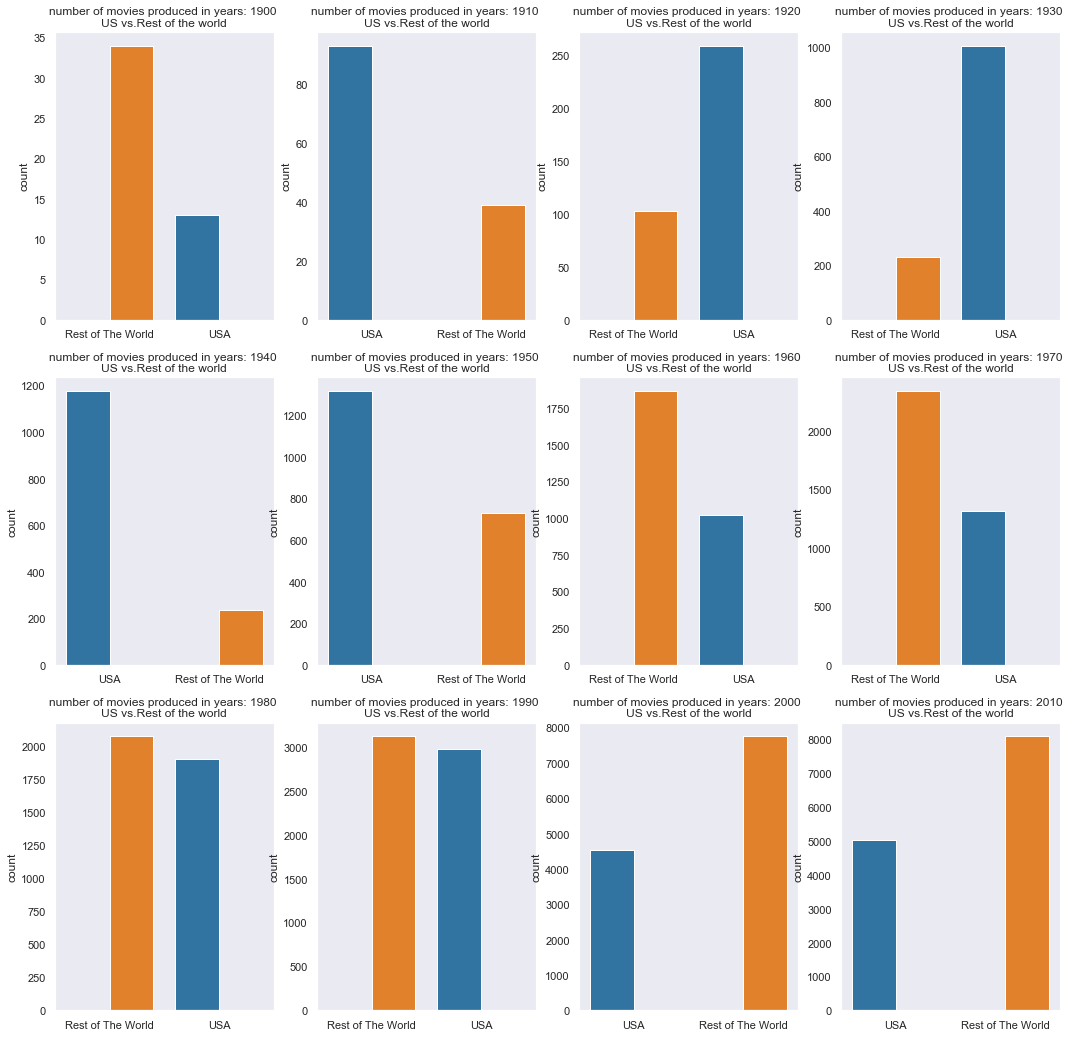

In [61]:
fig, axes=plt.subplots(3,4, figsize=(18,18))
grouped = country_lan_df[(country_lan_df.decade>1890) & (country_lan_df.decade<2020)].groupby('decade')
target=zip(grouped.groups.keys(), axes.flatten())
for key, ax in target:
    group = grouped.get_group(key)
    sns.countplot(x='us', data=group, hue='us', hue_order=['USA', 'Rest of The World'], ax=ax)
    ax.set_title('number of movies produced in years: {} \nUS vs.Rest of the world'.format(key))
    ax.set_xlabel("")
    ax.get_legend().remove()

**from 1910 to 1960, usa produced more movies in each decade than rest of the world combined**

# 9)movie popularity by year (mean and median)

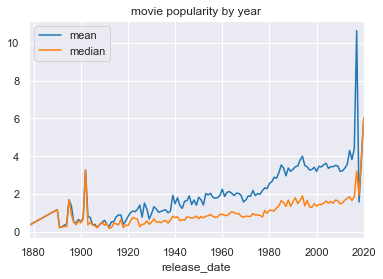

In [65]:
meta_credits.release_date = pd.to_datetime(meta_credits.release_date, format='%Y-%m-%d')
meta_credits.groupby(meta_credits.release_date.dt.year)['popularity'].mean().plot(title='movie popularity by year', label='mean')
meta_credits.groupby(meta_credits.release_date.dt.year)['popularity'].median().plot(title='movie popularity by year',label='median')
plt.grid(True)
plt.legend(loc='best')

**plot shows a  more or less constant increase in popularity of the movies since 1880, which seems reasonable, due to the fact that each movie finds it's own audience in the recent years, since the movie information can be found easily in the internet**